In [1]:
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import missingno as msno
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

#### Load the Dataset

In [2]:

bike = pd.read_csv('data/bike_train.csv',parse_dates=True, index_col=0)

In [3]:
bike.shape

(10886, 11)

In [4]:
bike.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
bikeC=bike.copy()


# EDA

In [6]:
def adding_features(df):
    df["hour"] = df.index.hour
    df["dayofweek"] = df.index.weekday
    df["month"]= df.index.month
    df["month^2"] = df["month"]**2
    df["year"]=df.index.year
    return df

In [7]:
bike=adding_features(bike)

### Bike Features

In [8]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
 11  hour        10886 non-null  int64  
 12  dayofweek   10886 non-null  int64  
 13  month       10886 non-null  int64  
 14  month^2     10886 non-null  int64  
 15  year        10886 non-null  int64  
dtypes: float64(3), int64(13)
memory usage: 1.4 MB


In [9]:
bike.nunique()

season          4
holiday         2
workingday      2
weather         4
temp           49
atemp          60
humidity       89
windspeed      28
casual        309
registered    731
count         822
hour           24
dayofweek       7
month          12
month^2        12
year            2
dtype: int64

In [10]:
bike.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,dayofweek,month,month^2,year
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5,1,1,2011
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,1,1,2011
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,5,1,1,2011
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,5,1,1,2011
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,5,1,1,2011


### General Overview

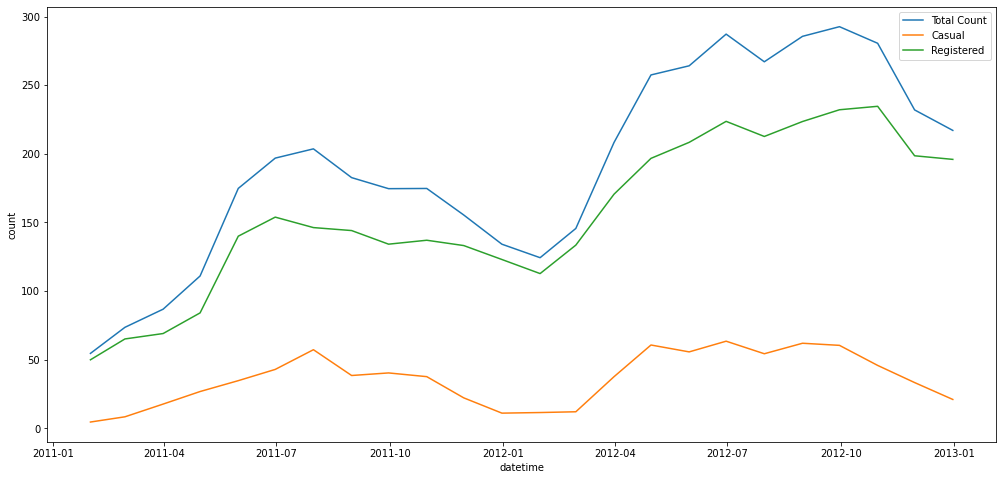

In [11]:
plt.figure(figsize = (17,8))
plt.gcf().set_facecolor('white')
sns.lineplot(x = bike.resample('M').mean().index, y = 'count',data = bike.resample('M').mean() , label="Total Count")
sns.lineplot(x = bike.resample('M').mean().index, y = 'casual',data = bike.resample('M').mean(), label="Casual")
sns.lineplot(x = bike.resample('M').mean().index, y = 'registered',data = bike.resample('M').mean(), label="Registered")
plt.legend(loc='upper right')

### Monthly Average Count Numbers 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, '2011-01-31 00:00:00'),
  Text(1, 0, '2011-02-28 00:00:00'),
  Text(2, 0, '2011-03-31 00:00:00'),
  Text(3, 0, '2011-04-30 00:00:00'),
  Text(4, 0, '2011-05-31 00:00:00'),
  Text(5, 0, '2011-06-30 00:00:00'),
  Text(6, 0, '2011-07-31 00:00:00'),
  Text(7, 0, '2011-08-31 00:00:00'),
  Text(8, 0, '2011-09-30 00:00:00'),
  Text(9, 0, '2011-10-31 00:00:00'),
  Text(10, 0, '2011-11-30 00:00:00'),
  Text(11, 0, '2011-12-31 00:00:00'),
  Text(12, 0, '2012-01-31 00:00:00'),
  Text(13, 0, '2012-02-29 00:00:00'),
  Text(14, 0, '2012-03-31 00:00:00'),
  Text(15, 0, '2012-04-30 00:00:00'),
  Text(16, 0, '2012-05-31 00:00:00'),
  Text(17, 0, '2012-06-30 00:00:00'),
  Text(18, 0, '2012-07-31 00:00:00'),
  Text(19, 0, '2012-08-31 00:00:00'),
  Text(20, 0, '2012-09-30 00:00:00'),
  Text(21, 0, '2012-10-31 00:00:00'),
  Text(22, 0, '2012-11-30 00:00:00'),
  Text(23, 0, '2012-12

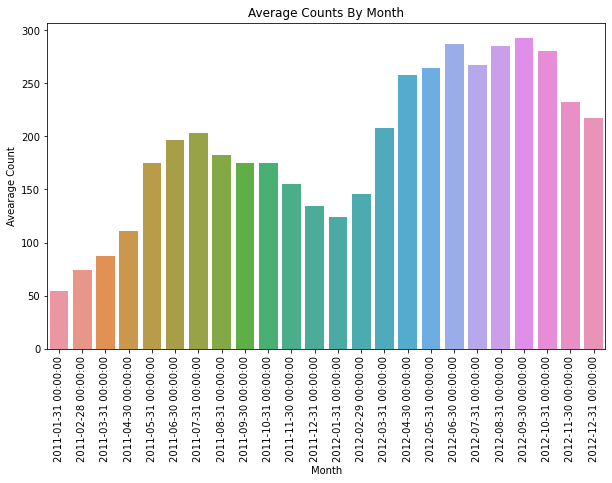

In [12]:
plt.figure(figsize = (10,6))
plt.gcf().set_facecolor('white')
ax=sns.barplot(x = bike.resample('M').mean().index, y = 'count',data = bike.resample('M').mean() , label="Total Count")
ax.set(xlabel='Month', ylabel='Avearage Count',title="Average Counts By Month")
plt.xticks(rotation = 90)


([<matplotlib.axis.XTick at 0x1a870726970>,
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

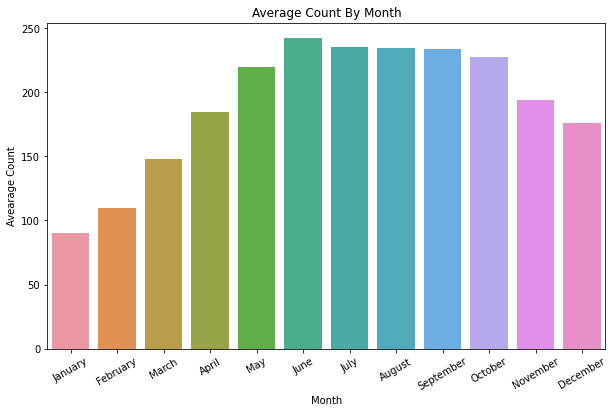

In [13]:
plt.figure(figsize = (10,6))
plt.gcf().set_facecolor('white')
bike_month = pd.DataFrame(bike.groupby("month")["count"].mean()).reset_index()
ax=sns.barplot(data=bike_month,x="month",y="count")
ax.set(xlabel='Month', ylabel='Avearage Count',title="Average Count By Month")
my_xticks = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
plt.xticks(bike_month["month"].unique()-1, my_xticks,rotation = 30)


### Average Count Numbers on Seasons 

([<matplotlib.axis.XTick at 0x1a870649fd0>,
 [Text(0, 0, 'Spring'),
  Text(1, 0, 'Summer'),
  Text(2, 0, 'Fall'),
  Text(3, 0, 'Winter')])

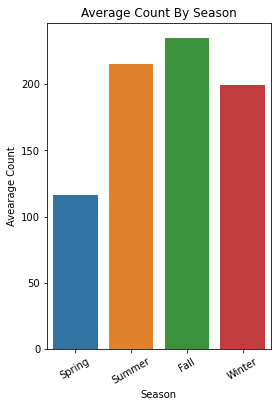

In [14]:
plt.figure(figsize = (4,6))
plt.gcf().set_facecolor('white')
bike_season = pd.DataFrame(bike.groupby("season")["count"].mean()).reset_index()
ax=sns.barplot(data=bike_season,x="season",y="count")
ax.set(xlabel='Season', ylabel='Avearage Count',title="Average Count By Season")
my_xticks = ["Spring","Summer","Fall","Winter"]
plt.xticks(bike_season["season"].unique()-1, my_xticks,rotation = 30)

### Average Count Numbers on Hours 

[Text(0.5, 0, 'Hour'),
 Text(0, 0.5, 'Avearage Count'),
 Text(0.5, 1.0, 'Average Count By Hour')]

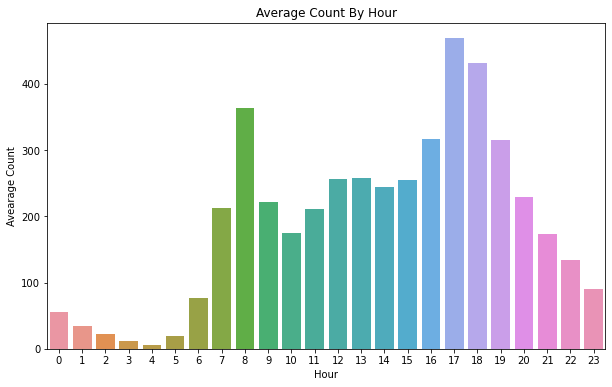

In [15]:
plt.figure(figsize = (10,6))
plt.gcf().set_facecolor('white')
bike_hour= pd.DataFrame(bike.groupby("hour")["count"].mean()).reset_index()
ax=sns.barplot(data=bike_hour,x="hour",y="count")
ax.set(xlabel='Hour', ylabel='Avearage Count',title="Average Count By Hour")

### Average Count Numbers on Days

([<matplotlib.axis.XTick at 0x1a870b552b0>,
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

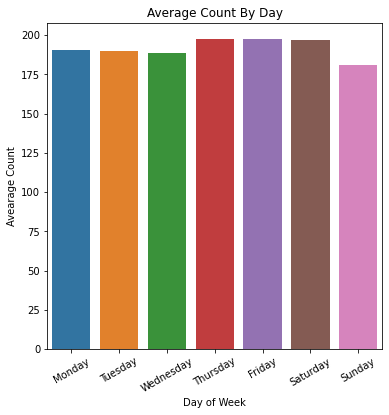

In [16]:
plt.figure(figsize = (6,6))
plt.gcf().set_facecolor('white')
bike_dayofweek= pd.DataFrame(bike.groupby(["dayofweek"])["count"].mean()).reset_index()
ax=sns.barplot(data=bike_dayofweek,x="dayofweek",y="count")
ax.set(xlabel='Day of Week', ylabel='Avearage Count',title="Average Count By Day")
my_xticks = ["Monday","Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday"]
plt.xticks(bike_dayofweek["dayofweek"].unique(), my_xticks,rotation = 30)

[Text(0.5, 0, 'Working Day'),
 Text(0, 0.5, 'Avearage Count'),
 Text(0.5, 1.0, 'Average Count By Working Day')]

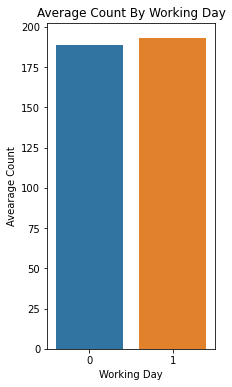

In [17]:
plt.figure(figsize = (3,6))
plt.gcf().set_facecolor('white')
bike_workingday= pd.DataFrame(bike.groupby("workingday")["count"].mean()).reset_index()
ax=sns.barplot(data=bike_workingday,x="workingday",y="count")
ax.set(xlabel='Working Day', ylabel='Avearage Count',title="Average Count By Working Day")

### Corelation Matrix on heatmap

<AxesSubplot:>

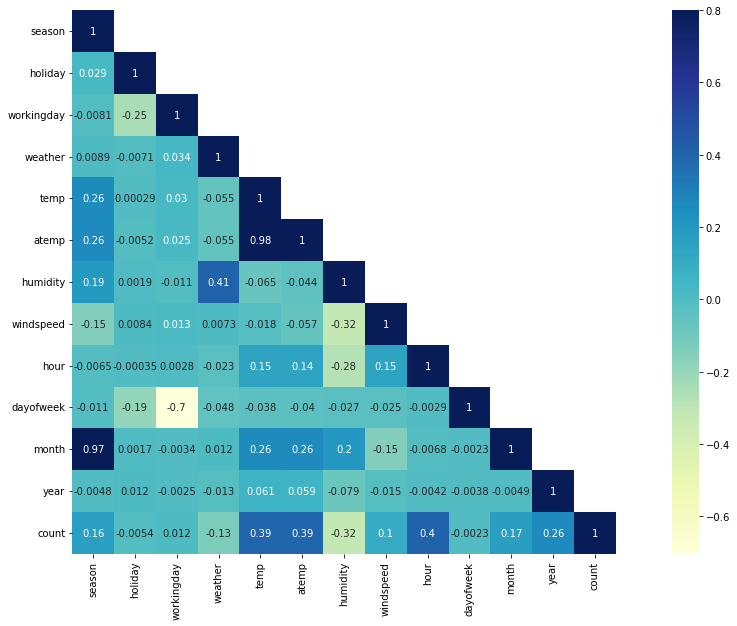

In [18]:
cor_mat = bike[["season", "holiday","workingday", "weather", "temp","atemp","humidity","windspeed","hour","dayofweek","month","year","count"]].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
plt.gcf().set_facecolor('white')
sns.heatmap(cor_mat, mask=mask,vmax=.8, square=True,annot=True,cmap="YlGnBu")

### Checking Outliers

[Text(0.5, 0, 'Working Day'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Box Plot On Count Across Working Day')]

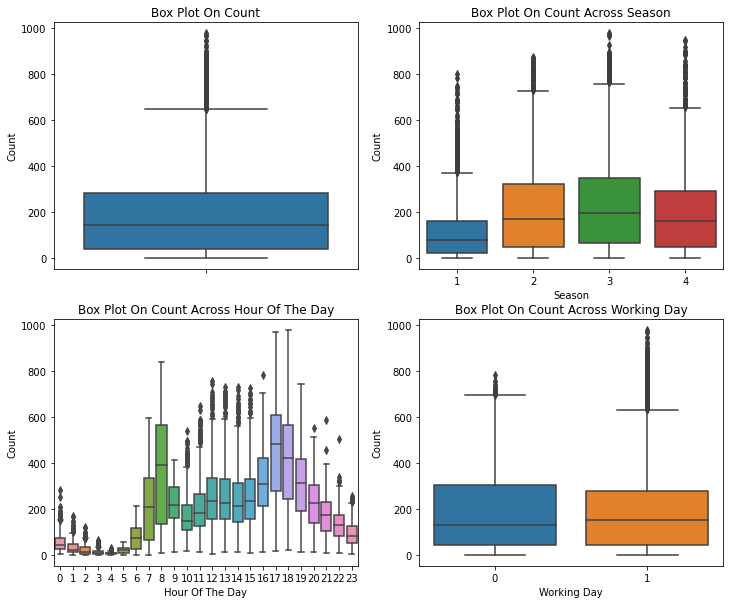

In [19]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sns.boxplot(data=bike,y="count",orient="v",ax=axes[0][0])
sns.boxplot(data=bike,y="count",x="season",orient="v",ax=axes[0][1])
sns.boxplot(data=bike,y="count",x="hour",orient="v",ax=axes[1][0])
sns.boxplot(data=bike,y="count",x="workingday",orient="v",ax=axes[1][1])
plt.gcf().set_facecolor('white')

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")

### FEATURE ENGINEERING

- Removing Outliers

In [20]:
def removing_outliers(df, feature_names):
    df_trans=df.copy()
    for i in range(len(feature_names)):
        current=feature_names[i]
        df_trans = df_trans[np.abs(df_trans[current]-df_trans[current].mean())<=(3*df_trans[current].std())]
    return df_trans        

- Dropping unneccessary features

In [21]:
def drop_features(df,feature_names):
    df_trans=df.drop(feature_names,axis=1)
    return df_trans

- ALL One Hot Encoder

In [22]:
from sklearn.preprocessing import OneHotEncoder
def all_oneHotEncoder(df,feature_names):
    
    all_oneHot=pd.DataFrame()
    for i in range(len(feature_names)):
        current=df[[feature_names[i]]]
        #transform a categorical column
        ohc = OneHotEncoder(sparse=False, handle_unknown='ignore')
        ohc.fit(current)            # learn the classes
        t = ohc.transform(current)  # result is a numpy array
    
        #format output as a DataFame
        current_transformed = pd.DataFrame(t, columns=feature_names[i]+"_"+ohc.get_feature_names())
        current_transformed.set_index(current.index, inplace=True)
        df.drop(feature_names[i],axis=1, inplace=True)
        all_oneHot=pd.concat([all_oneHot,current_transformed], axis=1)
    df_transformed=pd.concat([df,all_oneHot], axis=1)    
    return df_transformed
    

- ALL Log Transformer

In [23]:
def all_logFeatures(df,feature_names):
    for i in range(len(feature_names)):
        current=feature_names[i]
        df[current]=np.log1p(df[current]+0.000001)
    return df         

- ALL 0 Filler by Random Forest

In [24]:
from sklearn.ensemble import RandomForestRegressor
def all_fill0s_byRandomForest(df, feature_names):
    for i in range(len(feature_names)):
        current=feature_names[i]
        df_0 = df[df[current]==0]
        df_not0= df[df[current]!=0]
        rf_model= RandomForestRegressor()
        features = list(set(df.columns.values.tolist())-set([current]))
        rf_model.fit(df_not0[features], df_not0[current])
        newvalues = rf_model.predict(df_0[features])
        df_0[current] = newvalues
        df_transformed = df_not0.append(df_0)
    return df_transformed   
    

In [25]:
def before_transfrom(df):
    #Adding features
    df_trans=adding_features(df)
    #Removing outliers
    df_trans=removing_outliers(df_trans, ["count"])
    #y
    y=df_trans["count"]
    #Dropping unneccessary features
    X=drop_features(df_trans, ['casual',"count","atemp","registered","season"])
    return X,y

In [26]:
def before_transfrom_real(df):
    #Adding features
    df_trans=adding_features(df)
    #Dropping unneccessary features
    X=drop_features(df_trans, ["atemp","season"])
    return X

In [27]:
def  transform(df_train):
    
    #Apply Random Forest for 0 Values
    #df_trans=all_fill0s_byRandomForest(df_train,["windspeed"])
    #Apply all log features
    df_trans=all_logFeatures(df_train,["humidity","temp","windspeed"])
    #Apply one hot encoder
    df_trans=all_oneHotEncoder(df_trans,["hour","month","year"],)
  
    return df_trans
    

# Splitting and Transforming Data

In [28]:
X,y=before_transfrom(bikeC)

In [29]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42)

In [30]:
Xtrain_transformed=transform(Xtrain)
Xtest_transformed=transform(Xtest)


In [31]:
Xtrain_transformed.shape

(8054, 46)

In [32]:
Xtrain_transformed.head()

,holiday,workingday,weather,temp,humidity,windspeed,dayofweek,month^2,hour_x0_0,hour_x0_1,...,month_x0_5,month_x0_6,month_x0_7,month_x0_8,month_x0_9,month_x0_10,month_x0_11,month_x0_12,year_x0_2011,year_x0_2012
datetime,,,,,,,,,,,,,,,,,,,,,
2011-12-02 17:00:00,0,1,1,2.902520,3.663562,9.999995e-07,4,144,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2012-03-03 06:00:00,0,0,2,2.757475,4.543295,1.946367e+00,5,9,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2011-03-11 15:00:00,0,1,2,2.704042,3.988984,2.890255e+00,4,9,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2011-09-17 14:00:00,0,0,2,3.105483,4.290459,2.638915e+00,5,81,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2012-07-19 12:00:00,0,1,1,3.567841,3.912023,2.995792e+00,3,49,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [33]:
Xtest_transformed.shape

(2685, 46)

### Running Lineer MODEL

In [34]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import numpy as np
from sklearn.metrics import mean_squared_log_error
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Initialize logistic regression model
lineer_model = LinearRegression()

# Get the log of ytrain
ytrain_log= np.log1p(ytrain)
# fit the model on the transformed train data
lineer_model.fit(X = Xtrain_transformed,y = ytrain_log)
# Score on the train data
print("Train score :", lineer_model.score(Xtrain_transformed, ytrain_log))
# Score on the test data
ytest_log= np.log1p(ytest)
print("Test score :", lineer_model.score(Xtest_transformed, ytest_log))

# Make predictions on train
y_preds_train_log = lineer_model.predict(Xtrain_transformed)
y_preds_train=np.exp(y_preds_train_log)
# Make predictions on test
y_preds_test_log = lineer_model.predict(Xtest_transformed)
y_preds_test=np.exp(y_preds_test_log)

RMSLE_train=np.sqrt(mean_squared_log_error(ytrain,y_preds_train))
RMSLE_test=np.sqrt(mean_squared_log_error(ytest,y_preds_test))

print ("RMSLE Value on TRAIN For Linear Regression: "+ str(RMSLE_train))
print ("RMSLE Value on TEST For Linear Regression: "+ str(RMSLE_test))


Train score : 0.8237522651026624
Test score : 0.8273991904130744
RMSLE Value on TRAIN For Linear Regression: 0.5940552745292494
RMSLE Value on TEST For Linear Regression: 0.5817538964601171


### Cross Validation

- On Train Data

In [35]:
from sklearn.model_selection import cross_validate
cv = cross_validate(lineer_model, X = Xtrain_transformed,y = ytrain_log,
                    cv=5,
                    scoring="r2",
                    return_train_score=True
                    
)
# convert the dictionary of lists into a DataFrame
cv = pd.DataFrame(cv)
print(cv)

   fit_time  score_time  test_score  train_score
0  0.016994    0.001998    0.818404     0.824759
1  0.019300    0.000000    0.827633     0.822519
2  0.021106    0.002000    0.802958     0.828188
3  0.018000    0.002998    0.832100     0.821316
4  0.017272    0.001984    0.825407     0.823098


On Test Data

In [36]:
cv = cross_validate(lineer_model, X = Xtest_transformed,y = ytest_log,
                    cv=5,
                    scoring="neg_mean_squared_log_error",
                    return_train_score=True
)
# convert the dictionary of lists into a DataFrame
cv = pd.DataFrame(cv)
print(cv)

   fit_time  score_time  test_score  train_score
0  0.012000     0.00305   -0.017726    -0.018052
1  0.014482     0.00300   -0.019150    -0.017822
2  0.012046     0.00000   -0.020495    -0.017539
3  0.000000     0.00000   -0.019368    -0.017775
4  0.013106     0.00000   -0.017459    -0.018396


In [37]:
def plot_pred(true_value, predicted_value):
    plt.figure(figsize=(10,10))
    plt.gcf().set_facecolor('white')
    plt.scatter(true_value, predicted_value, c='crimson')
    plt.yscale('log')
    plt.xscale('log')

    p1 = max(max(predicted_value), max(true_value))
    p2 = min(min(predicted_value), min(true_value))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    plt.show()
    

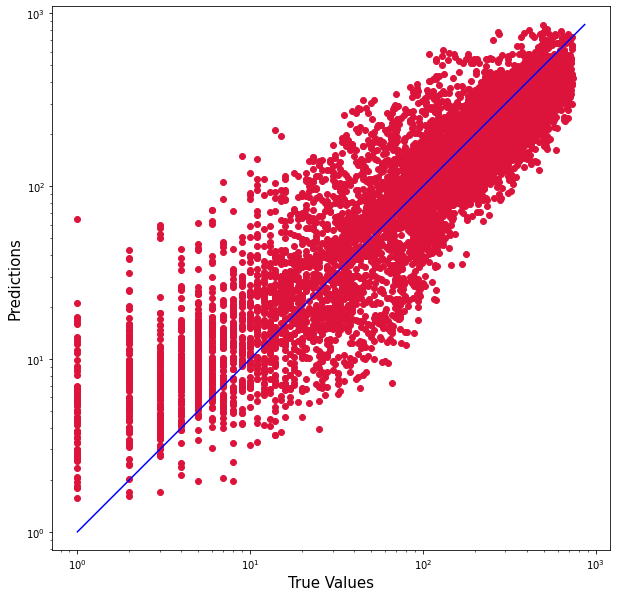

In [38]:
plot_pred(ytrain, y_preds_train)

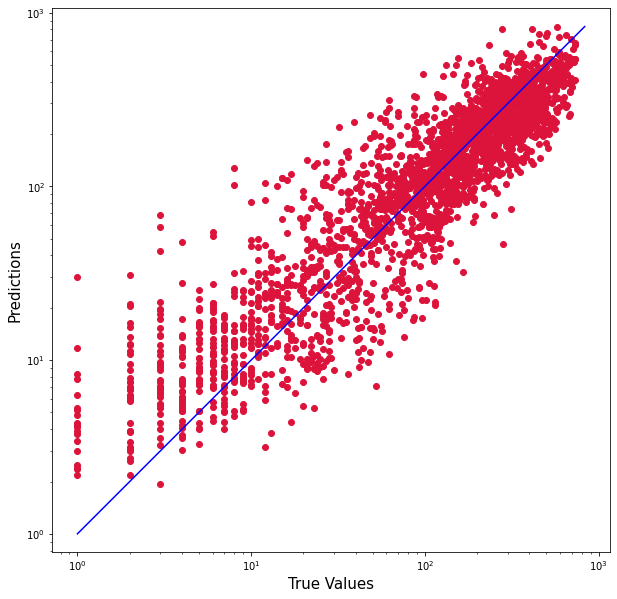

In [39]:
plot_pred(ytest, y_preds_test)

In [46]:
type(ytrain_log)

pandas.core.series.Series

# Running on Random Forest

In [54]:
from sklearn.ensemble import RandomForestRegressor
model2= RandomForestRegressor(n_estimators=100)
# fit the model
model2.fit(Xtrain_transformed, ytrain_log)
###
# calculate the accuracy score from train data
print("The Model score on the train: %.3f" % model2.score(Xtrain_transformed, ytrain_log))

# calculate the accuracy score from test data
print("The Model score on the test: %.3f" % model2.score(Xtest_transformed, ytest_log))

# Make predictions on train
y_preds_train_log = model2.predict(Xtrain_transformed)
y_preds_train=np.exp(y_preds_train_log)
# Make predictions on test
y_preds_test_log = model2.predict(Xtest_transformed)
y_preds_test=np.exp(y_preds_test_log)

RMSLE_train=np.sqrt(mean_squared_log_error(ytrain,y_preds_train))
RMSLE_test=np.sqrt(mean_squared_log_error(ytest,y_preds_test))

print ("RMSLE Value on TRAIN For Random Forest : "+ str(RMSLE_train))
print ("RMSLE Value on TEST For Random Forest: "+ str(RMSLE_test))

The Model score on the train: 0.992
The Model score on the test: 0.948
RMSLE Value on TRAIN For Random Forest : 0.15055775208010835
RMSLE Value on TEST For Random Forest: 0.32075582779855744


###  Regularization Model

- Ridge

In [1381]:
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(Xtrain_transformed, ytrain_log)

# Score on the train data
print("Ridge on Train score :", ridge_model.score(Xtrain_transformed, ytrain_log))
# Score on the test data
print("Ridge on Test score :", ridge_model.score(Xtest_transformed, ytest_log))


Ridge on Train score : 0.8237521794273313
Ridge on Test score : 0.8274014332958053


- Lasso

In [1382]:
lasso_model = Lasso(alpha=0.001)
lasso_model.fit(Xtrain_transformed, ytrain_log)

# Score on the train data
print("Lasso on Train score :", lasso_model.score(Xtrain_transformed, ytrain_log))
# Score on the test data
print("Lasso on Test score :", lasso_model.score(Xtest_transformed, ytest_log))

Lasso on Train score : 0.8231844991220079
Lasso on Test score : 0.8270004208254997


### Reading Kaggle Bike Data & Transformation

In [50]:
bike_Kaggle = pd.read_csv('data/bike_test.csv',parse_dates=True, index_col=0)
X_Kaggle=before_transfrom_real(bike_Kaggle)
X_Kaggle_transformed=transform(X_Kaggle) 

### Predicting Kaggle Data

In [51]:
# Make predictions on train
y_preds_Kaggle_log = model2.predict(X_Kaggle_transformed)
y_preds_Kaggle=np.exp(y_preds_Kaggle_log)

### Creating Submission File

In [52]:
bike_submission = pd.DataFrame()
bike_submission.index=X_Kaggle_transformed.index
bike_submission["count"]=y_preds_Kaggle.reshape(-1,1)
bike_submission.to_csv('data/Bike_Submission2.csv')
